# Quick modeling
- **문제: 과소추정**
- 값이 낮을 때의 예측은 상관하지 않아도 됨. (10% 이상인 날들만 test)

## Load data

In [1]:
import pickle
import pandas as pd
from tensorflow import keras
import matplotlib.pyplot as plt

In [2]:
# load data
with open('pickles/dangjin_merged.pkl','rb') as f:
    dangjin_merged = pickle.load(f)
with open('pickles/ulsan_merged.pkl','rb') as f:
    ulsan_merged = pickle.load(f)

## Quick NN (Dangjin)

In [91]:
# split data
def split_data(data):
    '''
    split into train, val, and test data
    with the ratio of 0.7:0.1:0.2
    '''
    idxs = int(data.shape[0] * 0.7), int(data.shape[0]*0.8)

    train = data.iloc[:idxs[0],:]
    val = data.iloc[idxs[0]:idxs[1],:]
    test = data.iloc[idxs[1]:,:]
    return train, val, test

train, val, test = split_data(dangjin_merged)

In [92]:
# split into x and y

x_train = train.iloc[:,1:-3]
y_train = train.iloc[:,-3:]

x_val = val.iloc[:,1:-3]
y_val = val.iloc[:,-3:]

x_test = test.iloc[:,1:-3]
y_test = test.iloc[:,-3:]
time_test = test.iloc[:,0]

final loss: 92.71231079101562
final val_loss: 107.05313110351562


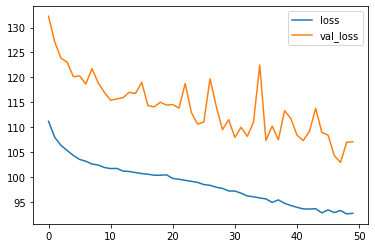

In [95]:
model = keras.Sequential([
    keras.layers.Dense(32),
    keras.layers.Dense(8),
    keras.layers.Dense(3)
])

model.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.Huber(), metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=0)

# Plot loss
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

# Loss
print('final loss:',history.history['loss'][-1])
print('final val_loss:',history.history['val_loss'][-1])

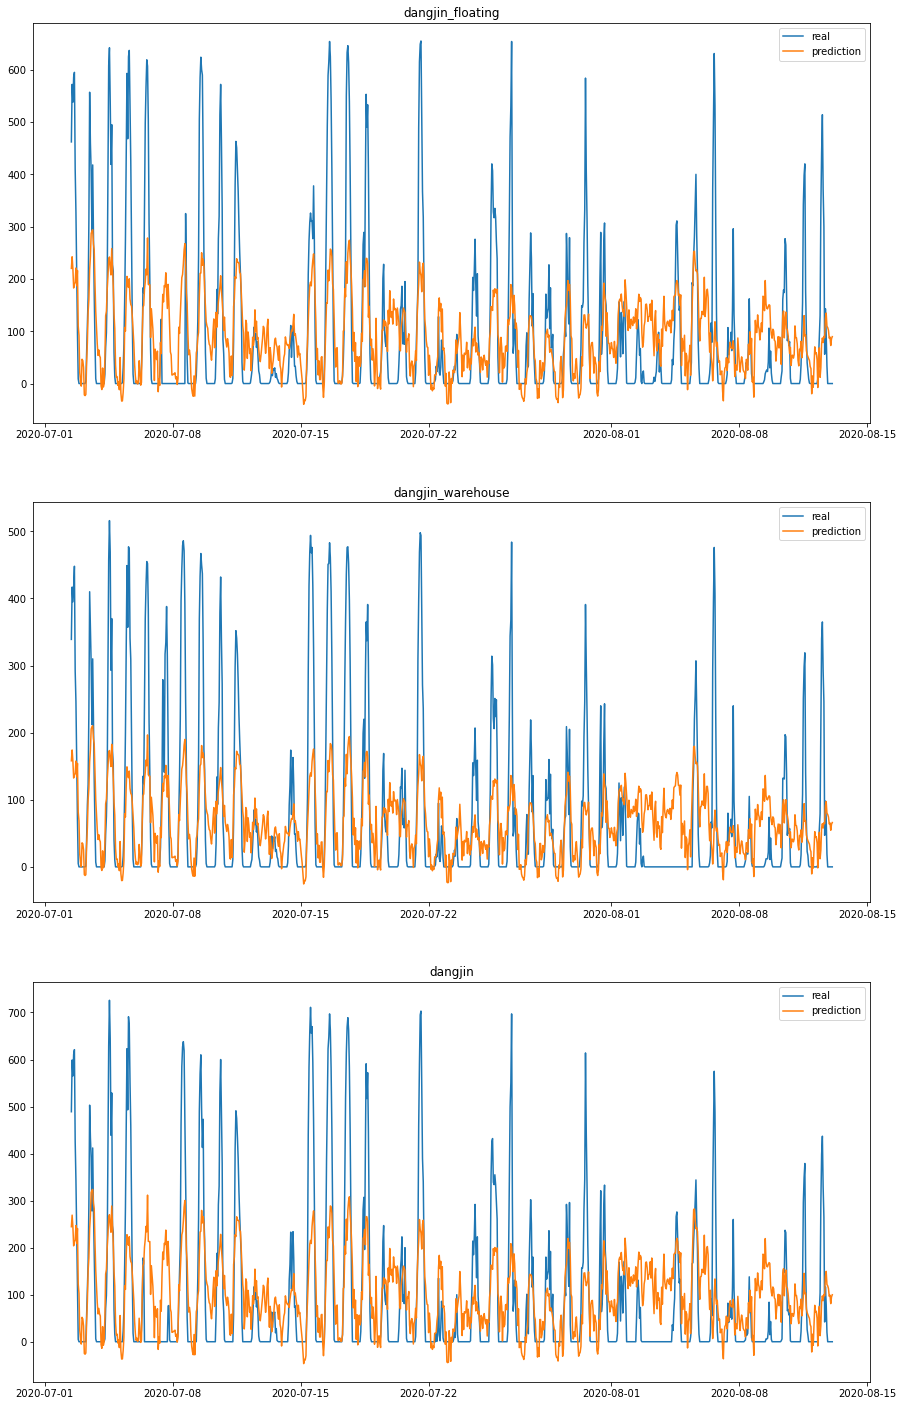

In [114]:
# prediction
prediction = model.predict(x_test)

window = 1000 # show first 1000 rows

fig, axes = plt.subplots(3,1,figsize=(15,25))

for i, col_name in enumerate(y_test.columns):
    ax = axes[i]

    ax.plot(time_test[:window], y_test.iloc[:window,i], label='real')
    ax.plot(time_test[:window], prediction[:window,i], label='prediction')

    ax.legend()
    ax.set_title(col_name)

## Ulsan

In [115]:
train, val, test = split_data(ulsan_merged)

x_train = train.iloc[:,1:-1]
y_train = train.iloc[:,-1:]

x_val = val.iloc[:,1:-1]
y_val = val.iloc[:,-1:]

x_test = test.iloc[:,1:-1]
y_test = test.iloc[:,-1:]
time_test = test.iloc[:,0]

final loss: 53.86179733276367
final val_loss: 62.81937026977539


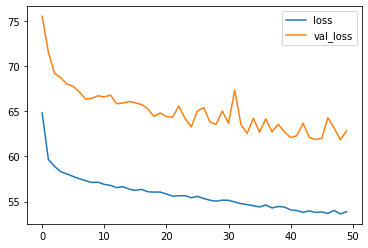

In [118]:
model = keras.Sequential([
    keras.layers.Dense(32),
    keras.layers.Dense(8),
    keras.layers.Dense(3)
])

model.compile(optimizer = keras.optimizers.Adam(), loss=keras.losses.Huber(), metrics=['mae'])

history = model.fit(x_train, y_train, epochs=50, validation_data=(x_val, y_val), verbose=0)

# Plot loss
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.legend()

# Loss
print('final loss:',history.history['loss'][-1])
print('final val_loss:',history.history['val_loss'][-1])

Text(0.5, 1.0, 'ulsan')

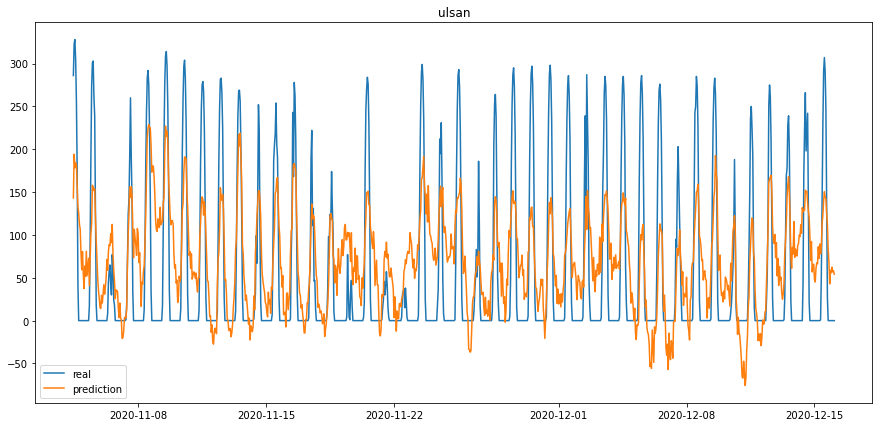

In [125]:
# prediction
prediction = model.predict(x_test)

window = (3000,4000) # show from window[0] to window[1]; 0~5024

fig, ax = plt.subplots(1,1,figsize=(15,7))


ax.plot(time_test[window[0]:window[1]], y_test.iloc[window[0]:window[1],i], label='real')
ax.plot(time_test[window[0]:window[1]], prediction[window[0]:window[1],i], label='prediction')

ax.legend()
ax.set_title('ulsan')